**파라미터와 하이퍼 파라미터의 차이**
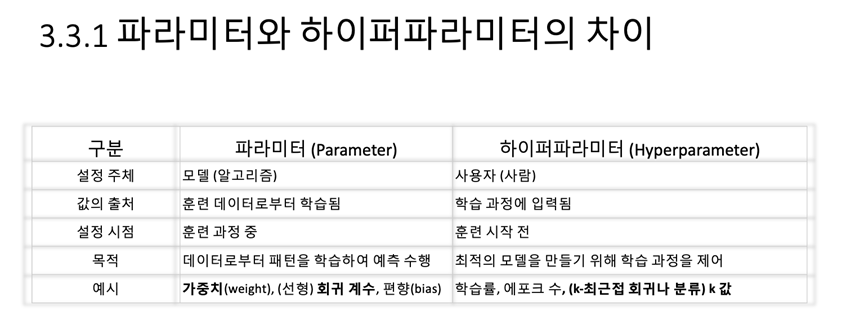

선현 회귀
* 단항 회귀(a**x**+b)
* 다항 회귀(a**x^2**+b**x**+c)
* 다중 회귀(a**x**+b**z**+c)


[1241.83860323]
[39.01714496] -709.0186449535477


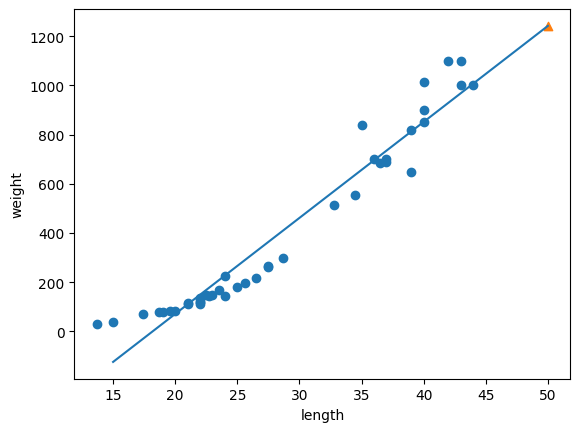

0.939846333997604
0.8247503123313558


In [ ]:
#단항 회귀: 1차 방정식
#1차 방정식 가정: a*길이 +b
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight,random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

lr.fit(train_input,train_target)

print(lr.predict([[50]]))
#a,b 출력하는셈(계수=가중치(AI), 절편=편향(AI))
print(lr.coef_,lr.intercept_)

#확인을 위한 산점도표시
plt.scatter(train_input,train_target)
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])
plt.scatter(50, 1241.8, marker = '^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(lr.score(train_input,train_target))
print(lr.score(test_input, test_target))

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


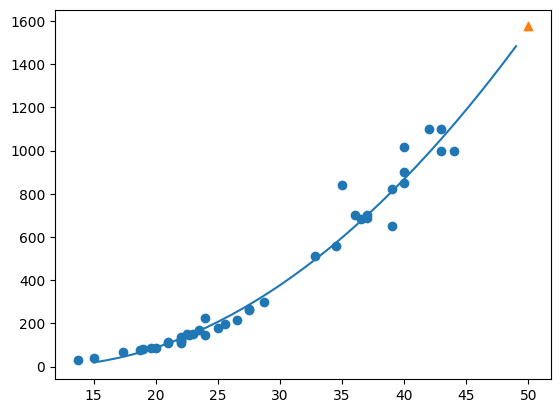

0.9706807451768623
0.9775935108325122


In [ ]:
#선형 회귀: 2차 방정식 데이터 분포를 잘 반영하는 그래프 찾기 위하여 차원을 늘림.
#2차 방정식 가정: 무게 = a * 길이^2 + b*길이 + c
#여기서 a,b,c를 구하는게 모델이 할일.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight,random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

#print(train_poly) [ 길이의 제곱, 길이] 로 이뤄진 배열
#print(test_poly)

lr.fit(train_poly,train_target)

print(lr.predict([[50**2,50]]))
#a,b,c를 출력하는셈
print(lr.coef_, lr.intercept_)

#구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만든다
point = np.arange(15,50)
#훈련 세트의 산점도를 그린다
plt.scatter(train_input,train_target)
#15에서 49까지 2차 방정식 그래프를 그린다
plt.plot(point,1.01*point**2 - 21.6*point + 116.05)
#50cm 농어 데이터
plt.scatter([50],[1574],marker='^')
plt.show()

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
